In [1]:
#mporting important libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [2]:
from tqdm import tqdm
import os

# Base directory of the dataset
BASE_DIR = r"C:\Users\vikra\Downloads\archive (1)\UTKFace"

# Lists to store extracted data
image_paths = []
age_labels = []
gender_labels = []

# Process each file in the dataset
for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')  # Split filename into components
    age = int(temp[0])  # Extract age
    gender = int(temp[1])  # Extract gender
    image_paths.append(image_path)  # Add image path
    age_labels.append(age)  # Add age label
    gender_labels.append(gender)  # Add gender label



100%|██████████| 23708/23708 [00:00<00:00, 381072.41it/s]


In [3]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head(5)


,image,age,gender
0,C:\Users\vikra\Downloads\archive (1)\UTKFace\1...,100,0
1,C:\Users\vikra\Downloads\archive (1)\UTKFace\1...,100,0
2,C:\Users\vikra\Downloads\archive (1)\UTKFace\1...,100,1
3,C:\Users\vikra\Downloads\archive (1)\UTKFace\1...,100,1
4,C:\Users\vikra\Downloads\archive (1)\UTKFace\1...,100,1


In [4]:
df.tail(5)

,image,age,gender
23703,C:\Users\vikra\Downloads\archive (1)\UTKFace\9...,9,1
23704,C:\Users\vikra\Downloads\archive (1)\UTKFace\9...,9,1
23705,C:\Users\vikra\Downloads\archive (1)\UTKFace\9...,9,1
23706,C:\Users\vikra\Downloads\archive (1)\UTKFace\9...,9,1
23707,C:\Users\vikra\Downloads\archive (1)\UTKFace\9...,9,1


In [5]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

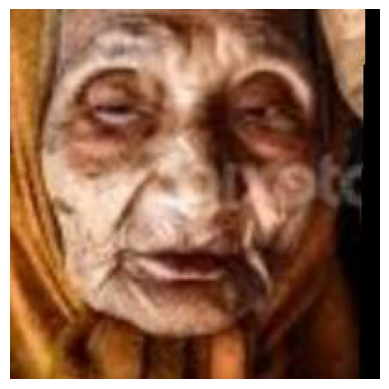

In [6]:
from PIL import Image
img = Image.open(df['image'][10])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

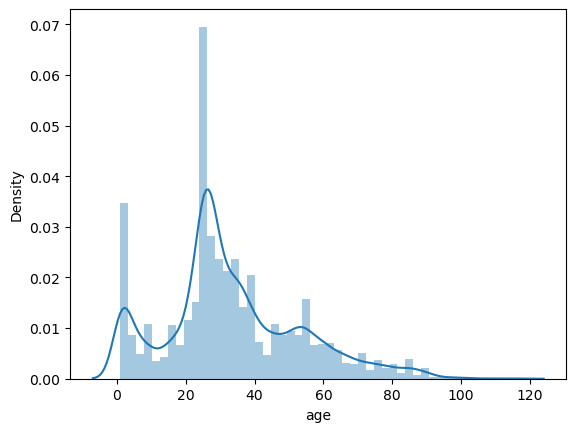

In [7]:
sns.distplot(df['age'])

<Axes: ylabel='count'>

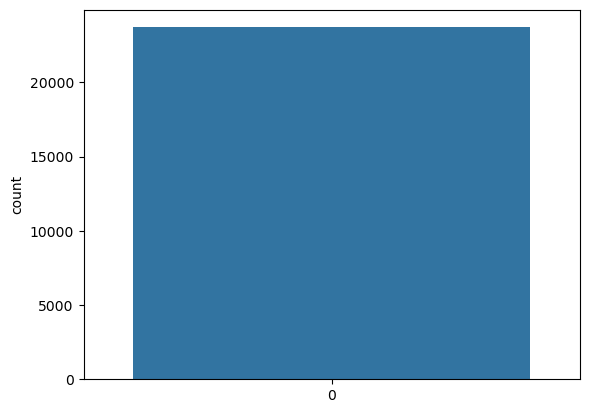

In [8]:
sns.countplot(df['gender'])

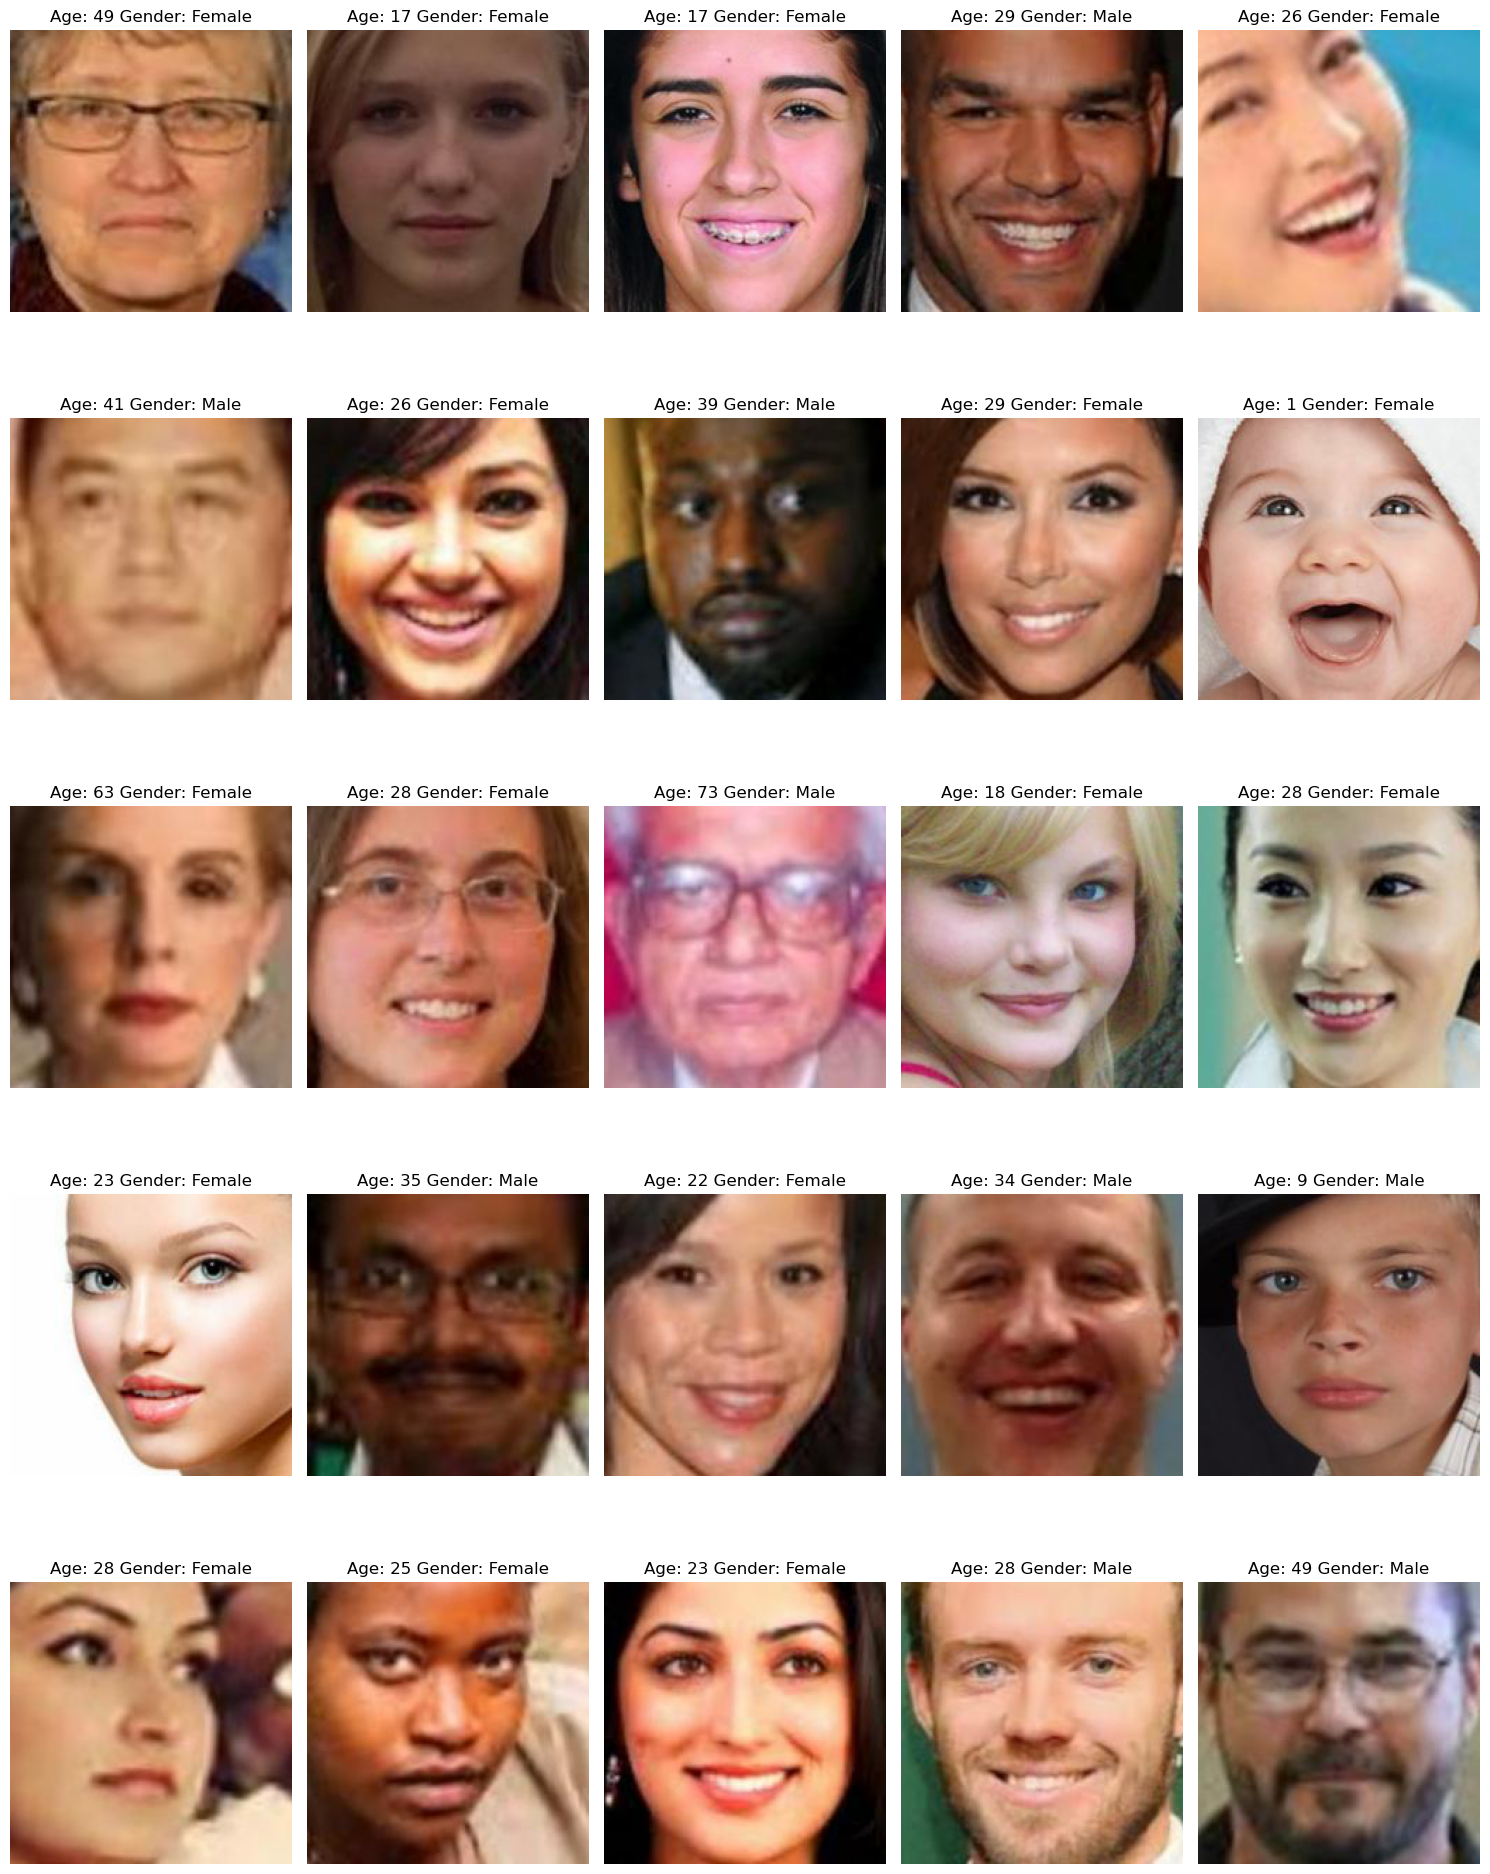

In [9]:
# Randomly sample 25 images for variety
sampled_df = df.sample(n=25, random_state=42)  # Set random_state for reproducibility

# Display images in a 5x5 grid
plt.figure(figsize=(15, 20))

for index, row in enumerate(sampled_df.itertuples()):
    # row is a namedtuple with index and the columns as fields
    file = row.image
    age = row.age
    gender = row.gender
    
    plt.subplot(5, 5, index + 1)
    img = load_img(file)  # Load image
    img = np.array(img)  # Convert to array for displaying
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
from PIL import Image #Python Imaging Library (Pillow) module for image processing tasks such as resizing and handling grayscale images.
from keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm #It provides a progress bar for iterating through a loop. This is useful for visual feedback when processing a large number of images.


def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.Resampling.LANCZOS)  # LANCZOS is a high-quality down-sampling filter
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # For grayscale images, reshape to (num_samples, 128, 128, 1)
    features = features.reshape(len(features), 128, 128, 1)  # 1 channel for grayscale
    return features

In [11]:
X = extract_features(df['image'])

100%|██████████| 23708/23708 [07:29<00:00, 52.69it/s]


In [12]:
X.shape

(23708, 128, 128, 1)

In [13]:
# normalize the images
X = X/255.0

In [14]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [15]:
input_shape = (128, 128, 1) #dimensions of data fed into network

In [24]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs) #32 filters of 3x3 size - ReLu activation function
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1) #Reduces spatial dimensions by taking the maximum value in each 2x2 region.
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4) #Converts the 2D feature maps (output from the final pooling layer) into a 1D vector.

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

#This CNN model extracts features from images and predicts both gender (classification) and age (regression).
#It uses shared convolutional layers for feature extraction and separate dense layers for each task.

In [26]:
import graphviz
print(graphviz.__version__)



0.20.3


In [30]:
model.summary()




Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 126, 126,  │        320 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 63, 63,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 30, 30,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 28, 28,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 14, 14,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 12, 12,    │    295,168 │ max_pooling2d_6[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 6, 6, 256) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 9216)      │          0 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │  2,359,552 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │  2,359,552 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 256)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_out (Dense)  │ (None, 1)         │        257 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_out (Dense)     │ (None, 1)         │        257 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,107,458 (19.48 MB)

 Trainable params: 5,107,458 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 260s 427ms/step - age_out_mae: 11.8891 - gender_out_accuracy: 0.5148 - loss: 12.6379 - val_age_out_mae: 29.6382 - val_gender_out_accuracy: 0.7058 - val_loss: 30.2097
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 261s 440ms/step - age_out_mae: 7.8580 - gender_out_accuracy: 0.7434 - loss: 8.3800 - val_age_out_mae: 29.6552 - val_gender_out_accuracy: 0.7638 - val_loss: 30.1547
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 249s 420ms/step - age_out_mae: 6.8996 - gender_out_accuracy: 0.8192 - loss: 7.2977 - val_age_out_mae: 26.9585 - val_gender_out_accuracy: 0.7811 - val_loss: 27.4363
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 274s 463ms/step - age_out_mae: 6.3411 - gender_out_accuracy: 0.8479 - loss: 6.6814 - val_age_out_mae: 25.0336 - val_gender_out_accuracy: 0.7701 - val_loss: 25.5352
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 255s 429ms/step - age_out_mae: 6.1627 - gender_out_accuracy: 0.8583 - loss: 6.4813 - val_age_out_mae: 22.4780 - val_gender_out_accuracy: 0.800

In [50]:
# Print the final accuracy for gender and age predictions
gender_accuracy = history.history['gender_out_accuracy'][-1]
age_accuracy = history.history['age_out_mae'][-1]

print(f"Final Gender Prediction Accuracy: {gender_accuracy:.4f}")
print(f"Final Age Prediction MAE: {age_accuracy:.4f}")


Final Gender Prediction Accuracy: 0.9551
Final Age Prediction MAE: 3.0859


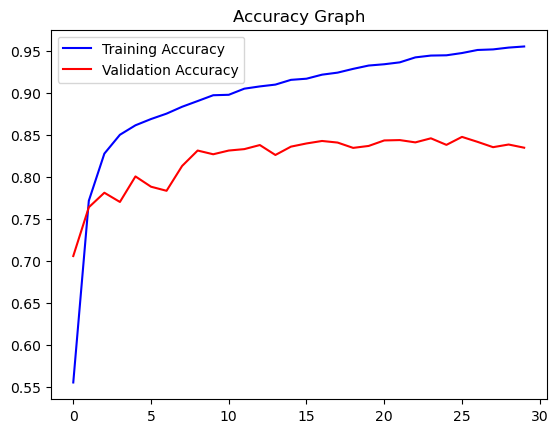

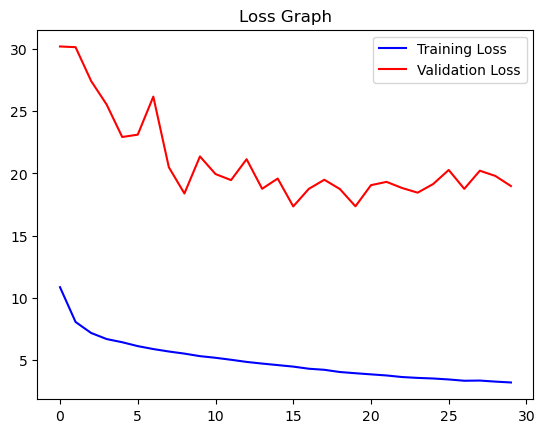

In [34]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

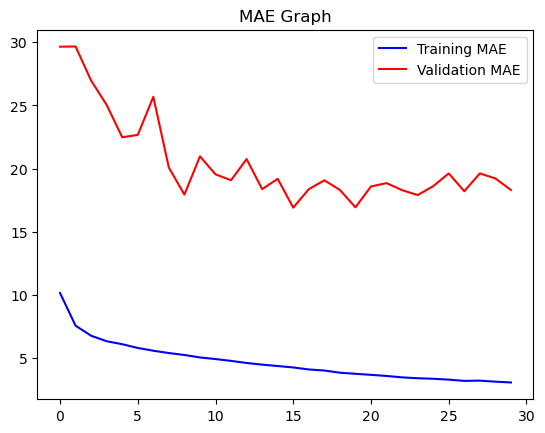

In [36]:
# plot results for age
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('MAE Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
Predicted Gender: Male Predicted Age: 17


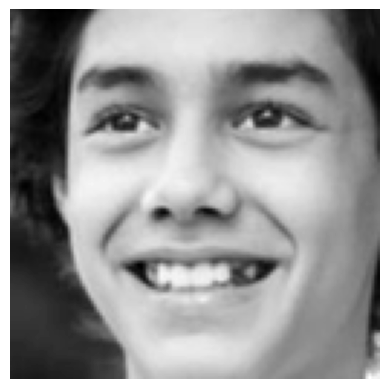

In [38]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Gender: Female Predicted Age: 0


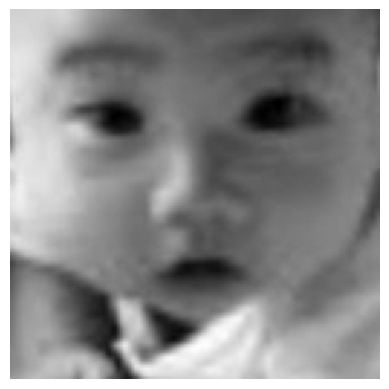

In [48]:
image_index = 2413
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


gender_dict = {0: 'Male', 1: 'Female'}

# Open webcam (index 0 for the default webcam)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break

    # Resize the frame to 128x128 and convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized_frame = cv2.resize(gray_frame, (128, 128))
    reshaped_frame = resized_frame.reshape(1, 128, 128, 1)  # Model input shape

    # Normalize the image to [0, 1] (same preprocessing as during training)
    reshaped_frame = reshaped_frame / 255.0

    # Make predictions on the current frame
    pred = model.predict(reshaped_frame)
    
    # Extract gender and age predictions
    pred_gender = gender_dict[round(pred[0][0][0])]
    pred_age = round(pred[1][0][0])

    # Display the predictions on the frame
    cv2.putText(frame, f"Gender: {pred_gender}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.putText(frame, f"Age: {pred_age}", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Show the frame
    cv2.imshow("Live Gender and Age Prediction", frame)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━